<a href="https://colab.research.google.com/github/tbonne/IntroDataScience/blob/main/fullNoteBooks/IntroViz3_scatterplots_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1C2o3BW9_N9LkeIi2lM4viUwvXK75G6Nc'>

## <font color='lightblue'>Scatter plots</font>

In this exercise we will learn how to plot data in scatter plots. Unlike the previous examples with histograms and density plots, scatter plots will let us look at two variables at once (i.e., bivariate relationships).



Import the libraries


In [15]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bring in the nyc flight data

In [16]:
df_flights = pd.read_csv('/content/nyc_flight_data.csv')

In our previous exercises we looked at departure and arrival delays as seperate, but are they related to each other. Let's use a scatter plot to see if higher departure delays lead to higher arrival delays.


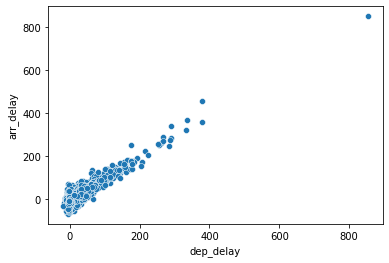

In [17]:
#plot a scaterplot
sns.scatterplot(data=df_flights, x='dep_delay',y='arr_delay')

Let's add some nicer labels to the axis of the plot.

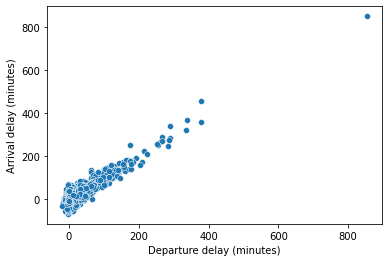

In [18]:
#scatterplot with labels
sns.scatterplot(data=df_flights, x='dep_delay',y='arr_delay').set(xlabel='Departure delay (minutes)', ylabel='Arrival delay (minutes)')

#save file
plt.savefig("delay_scatterplot.png")

This plot is showing that if departure delays are high, so too will arrival delays. In other words flights that start out late are not able to make up for lost time and end up arriving at their destination late.

## <font color='lightblue'>Estimate correlations</font>

> We will use the corr function build into pandas to estimate the correlation between departure delay and arrival delay.

In [19]:
#estimate correlation
df_flights.arr_delay.corr(df_flights.dep_delay)

0.9031850727070655

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Try and estimate correlations between a few other variables

In [20]:
#take a look at potential variables to compare
df_flights.head(3)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00


In [21]:
#estimate the correlation between two variables
df_flights.air_time.corr(df_flights.distance)

0.9847285707028729

What is the largest correlation you can find? Can you also plot this relationship as a scatter plot?

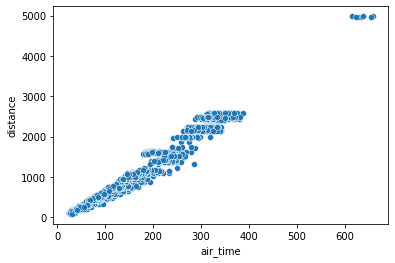

In [22]:
#Scatterplot
sns.scatterplot(data=df_flights, x='air_time',y='distance')

## <font color='lightblue'>Compare many variables using pair plots</font>

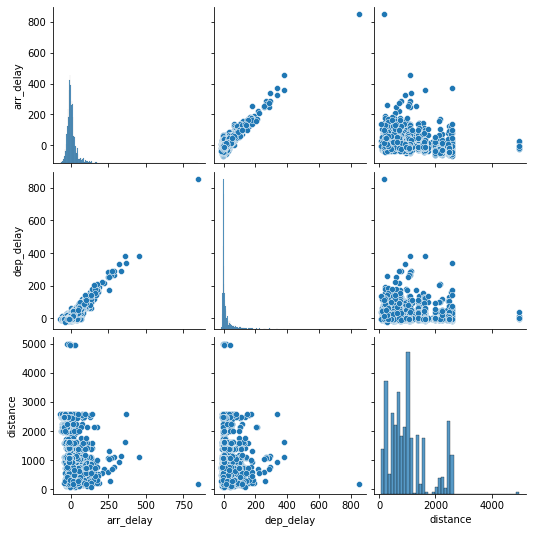

In [23]:
#let's choose some varibles to look at 
df_flights_pairs = df_flights[["arr_delay","dep_delay","distance","carrier"]] #notice it did not use carrier... why?

#use the pairplot method to look at all combinations of these variables
sns.pairplot(df_flights_pairs)

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'left'>  

Try and visualize the relationships between a few variables.

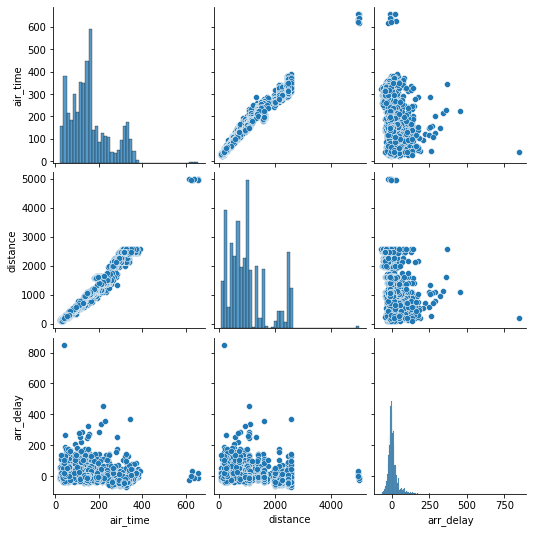

In [24]:
#Choose some varibles to look at 
df_flights_pairs = df_flights[["air_time","distance","arr_delay"]] #notice it did not use carrier... why?

#use the pairplot method to look at all combinations of these variables
sns.pairplot(df_flights_pairs)

## <font color='lightblue'>Heat Maps</font>

We will use our new found correlation skills to more effectively search for patterns in our data using heat maps! These maps can quickly help us identify high/low correlations between our variables.


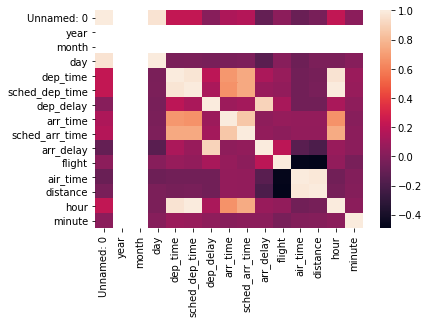

In [25]:
#run a correlation on all combinations of variables in df_flights
corrmat = df_flights.corr()

#plot the results as a heat map
sns.heatmap(corrmat, square=False)

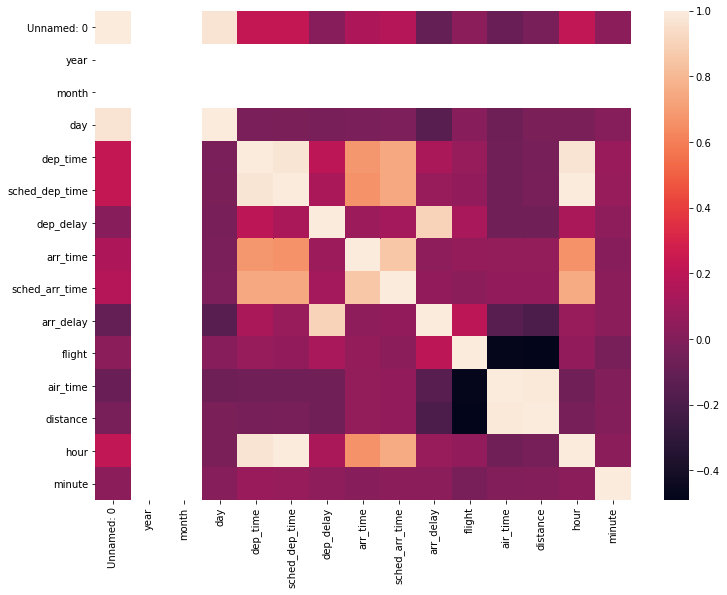

In [26]:
#plot the results as a heat map (this time let's make the figure bigger)
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=False)

Here we can see from the legend on the right that the lighter colours are combinations of variables that have high positive correlations. While darker colors have larger negative correlations.

Things to think about:
- do all these comparisons make sense? e.g., flight# and distance?
- what variable types are there?
- why are year and month not showing any values?

## <font color='lightblue'>Further reading</font>

Check out seaborn's very nice page on [plotting relationships using scatterplots](https://seaborn.pydata.org/tutorial/relational.html).

## <font color='lightblue'>Bonus material</font>

Visualizing your data is a very important step in any data science workflow. Let's take a look at the case below where four seperate datasets have the same mean and standard deviation, but differ wildly in how their data is ditributed.





<img src='http://drive.google.com/uc?export=view&id=1o1sS3SVNg7SFivTay0damWoN9hq9-0ap'>

Let's load in the data.

In [27]:
df_anscombe = pd.read_json("/content/sample_data/anscombe.json")

df_anscombe.head()

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


First let's show that each has the same summary statistics.

In [28]:
df_anscombe.groupby('Series').mean()

,X,Y
Series,,
I,9,7.500000
II,9,7.500909
III,9,7.500000
IV,9,7.500909


In [29]:
df_anscombe.groupby('Series').std()

,X,Y
Series,,
I,3.316625,2.032890
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


Now let's take a look using scatter plots

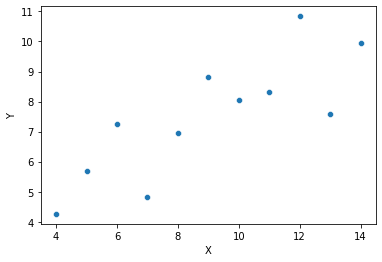

In [32]:
sns.scatterplot(data=df_anscombe[(df_anscombe.Series=="I")],x="X",y="Y")

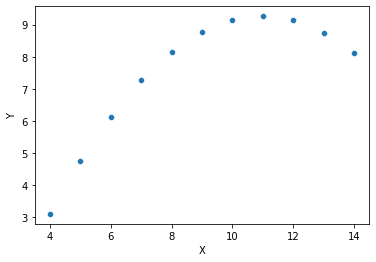

In [33]:
sns.scatterplot(data=df_anscombe[(df_anscombe.Series=="II")],x="X",y="Y")

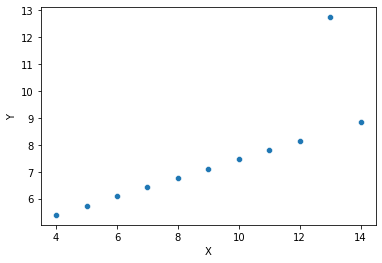

In [35]:
sns.scatterplot(data=df_anscombe[(df_anscombe.Series=="III")],x="X",y="Y")

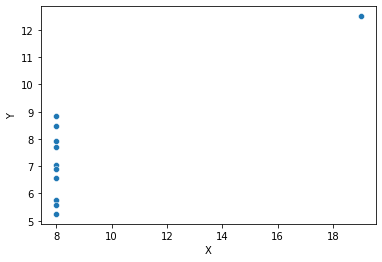

In [36]:
sns.scatterplot(data=df_anscombe[(df_anscombe.Series=="IV")],x="X",y="Y")

Even though each of these series of points have the same descriptive statistics (mean and standard deviation) they are very different in how they are distributed. This is why it is important to visualize your data!